   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Descriptive statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000

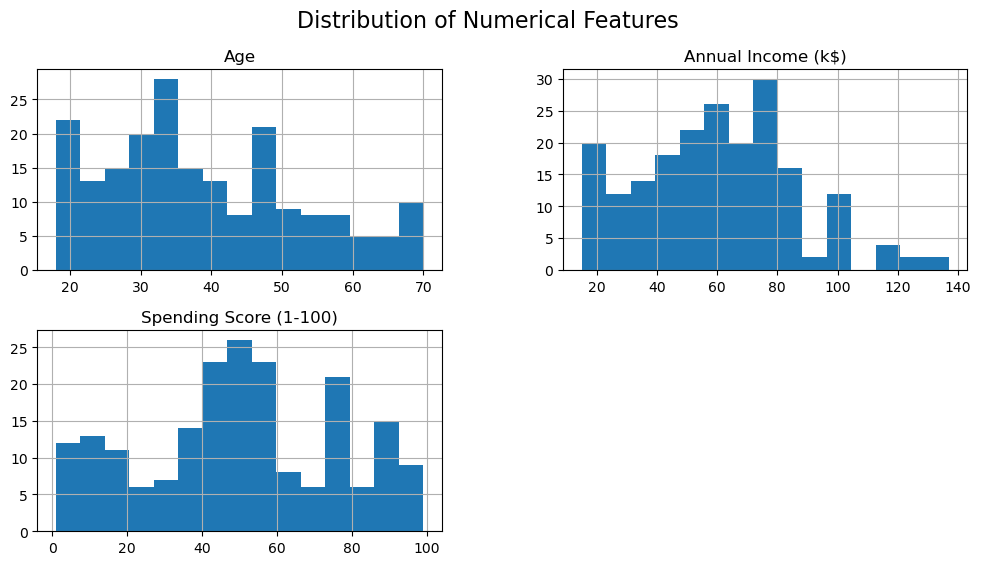

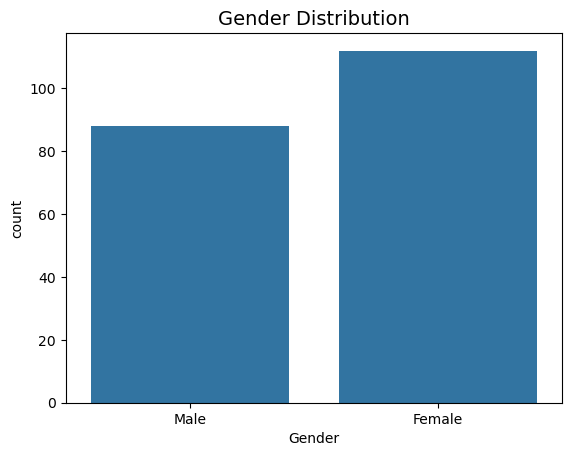

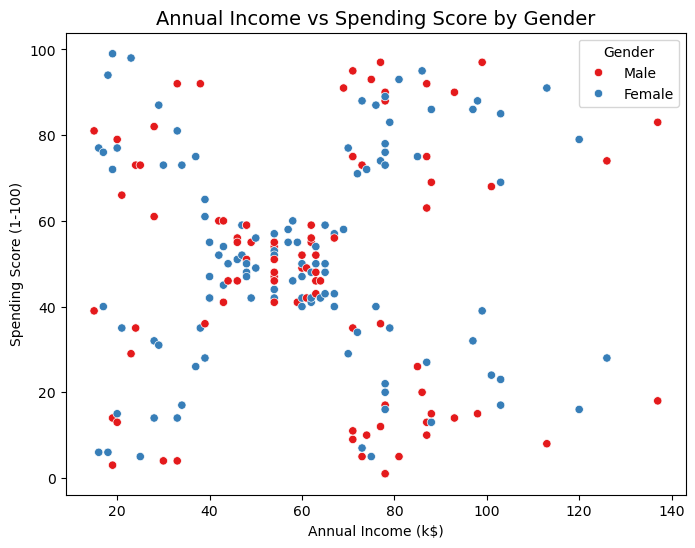

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


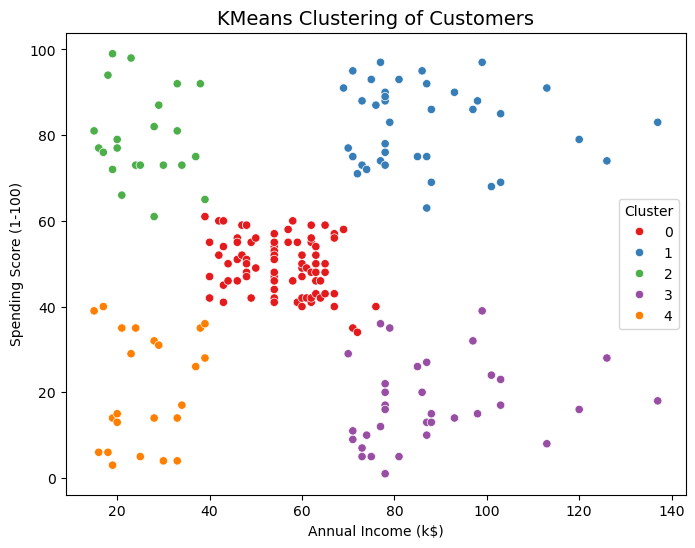

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
# Reading the CSV file into a pandas DataFrame
data = pd.read_csv('project1_mall-customers/data/mall_customers.csv')

# Display first 5 rows to inspect the data
print(data.head())

# Check for missing values
# Identify if there are any missing entries in the dataset
print("Missing values per column:")
print(data.isnull().sum())

# Basic descriptive statistics
# Get a summary of numerical columns to understand distributions
print("\nDescriptive statistics:")
print(data.describe())

# Data visualization: Histograms
# Visualizing the distribution of numerical features
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15, figsize=(12,6))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

# Data visualization: Gender distribution
# Count plot to visualize the number of male and female customers
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution', fontsize=14)
plt.show()

# Data visualization: Scatter plot
# Visualizing Annual Income vs Spending Score colored by Gender
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data, palette='Set1')
plt.title('Annual Income vs Spending Score by Gender', fontsize=14)
plt.show()

# Prepare data for clustering
# Selecting features relevant for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# KMeans clustering
# Creating the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the model to the data
kmeans.fit(X)

# Adding the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Display first 5 rows with cluster labels
print(data.head())

# Visualize clusters
# Scatter plot to visualize clusters in the dataset
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set1', data=data)
plt.title('KMeans Clustering of Customers', fontsize=14)
plt.show()